In [1]:
# Importing all necessary libraries 
from keras.preprocessing.image import ImageDataGenerator 
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D 
from keras.layers import Activation, Dropout, Flatten, Dense 
from keras import backend as K

import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt
from matplotlib.image import imread
import os
import cv2


In [2]:
img_width, img_height = 2000,2000
folder = 'Dataset/Train'
CATEGORIES = ['Normal', 'Abnormal']

for category in CATEGORIES:
    path = os.path.join(folder, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))

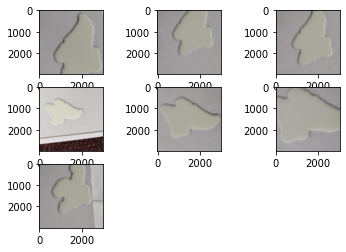

In [3]:
folder = 'Dataset/Train/Normal/'
# plot first few images
for i in range(7):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# define filename
	filename = folder + 'c106' + str(i) + '.jpg'
	# load image pixels
	image = imread(filename)
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

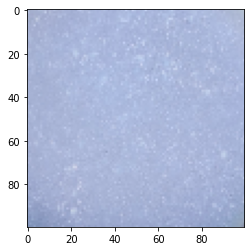

In [4]:
IMG_SIZE = 100
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array)
plt.show()

In [5]:
training_data = []
folder = 'Dataset/Train'
def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(folder, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
create_training_data()
            

In [6]:
print(len(training_data))

745


In [7]:
#This tries to balance the data. At first, it goes normal then abnormal. 
#Shuffle to mix the data
import random

random.shuffle(training_data)

In [8]:
for sample in training_data[:10]:
    print(sample[1])

0
0
0
0
1
0
0
0
1
1


In [9]:
X = []
y = []

In [10]:
for features, label in training_data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y = np.array(y).reshape(-1)

In [11]:
import pickle

pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()


In [12]:
pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)

In [13]:
X[1]

array([[[192],
        [190],
        [190],
        ...,
        [163],
        [162],
        [161]],

       [[191],
        [191],
        [191],
        ...,
        [162],
        [164],
        [162]],

       [[191],
        [191],
        [191],
        ...,
        [162],
        [163],
        [162]],

       ...,

       [[139],
        [141],
        [143],
        ...,
        [156],
        [156],
        [153]],

       [[137],
        [136],
        [140],
        ...,
        [154],
        [151],
        [153]],

       [[149],
        [145],
        [143],
        ...,
        [153],
        [152],
        [151]]], dtype=uint8)